In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#reading data into a dataframe
df=pd.read_csv('/home/user/Downloads/parkinsons.data')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.shape

(195, 24)

<AxesSubplot:>

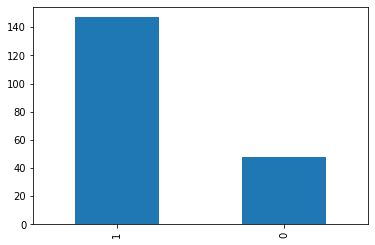

In [6]:
#checking the count of labels
df.status.value_counts().plot.bar()

In [7]:
#The data is imbalenced so we need to handle the imbalance before building the model

<AxesSubplot:>

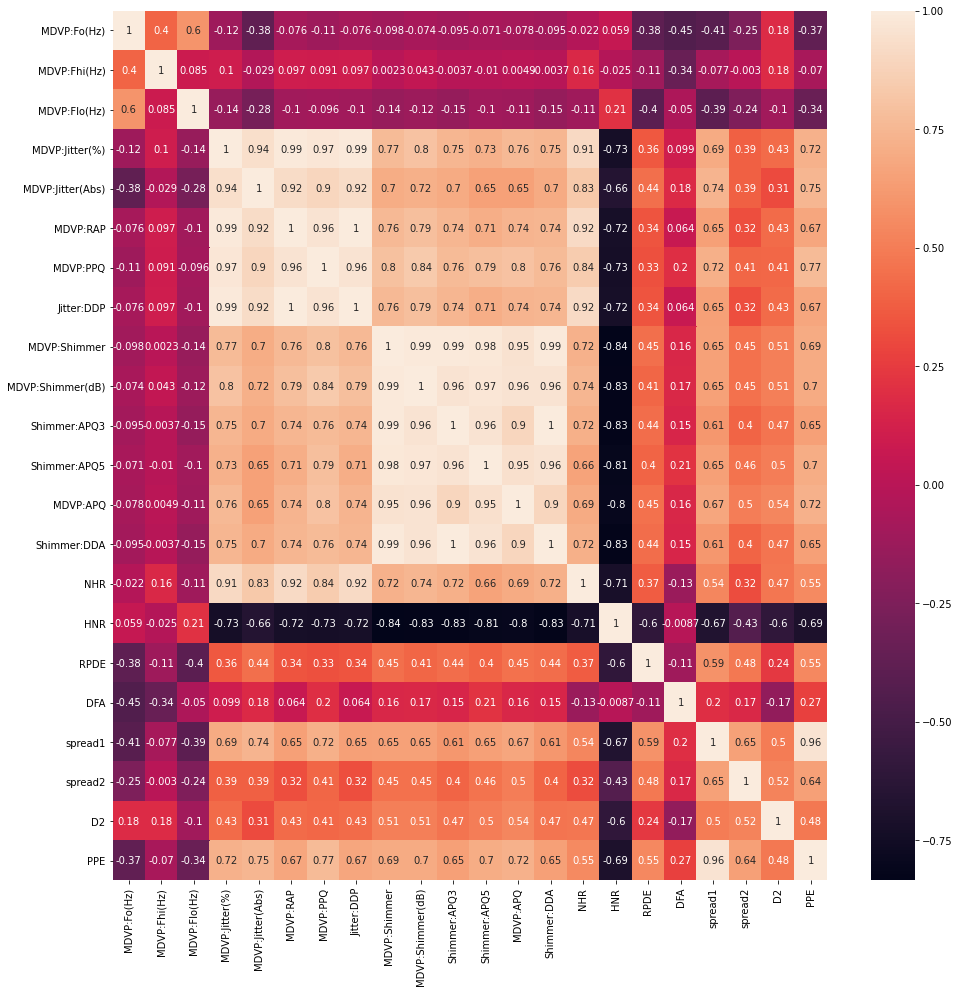

In [8]:
#finding the corelation between features
corelation = df.drop(['status'],axis=1).corr()
plt.figure(figsize=(16,16))
sns.heatmap(corelation,annot=True)

In [9]:
#dropping features that have high correlation (correlation >= 0.94)
df.drop(['name','Jitter:DDP','Shimmer:APQ3','MDVP:Shimmer(dB)','MDVP:Shimmer','MDVP:RAP','MDVP:PPQ','Shimmer:DDA','PPE','MDVP:APQ','MDVP:Jitter(Abs)'],axis=1,inplace=True)

<AxesSubplot:>

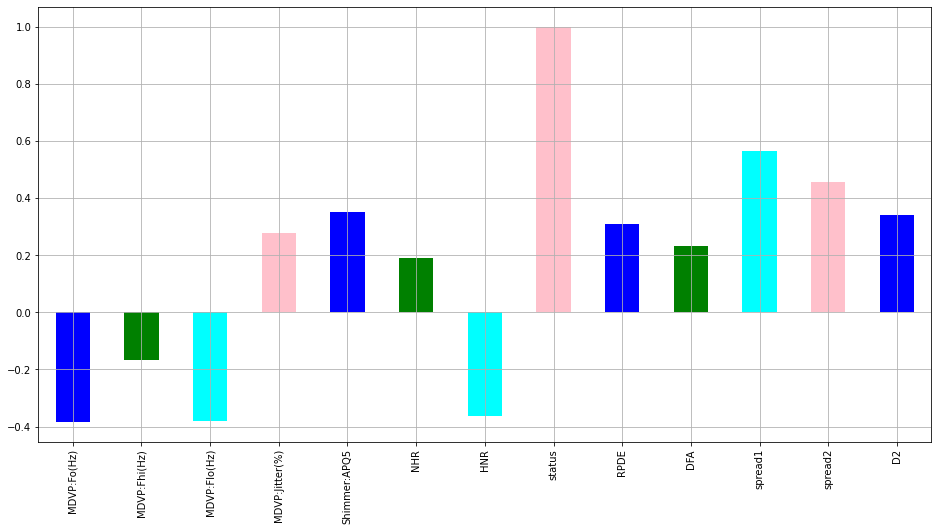

In [10]:
#checking corelation of features with label
df.corrwith(df.status).plot.bar(grid=True,figsize=(16,8),color=['blue','green','cyan','pink'])

In [11]:
#splitting the features and label
x=df.drop(['status'],axis=1)
y=df.status

In [12]:
#splitting data into training and testing data
x1,x_test,y1,y_test=train_test_split(x,y,test_size=.2,random_state=10)
x1.shape,y1.shape,x_test.shape,y_test.shape

((156, 12), (156,), (39, 12), (39,))

In [14]:
#Oversampling the training data
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x1, y1)

In [15]:
x_train.shape,y_train.shape

((238, 12), (238,))

In [24]:
#building model using randomforest algorithm
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [25]:
confusion_matrix(y_test,y_pred)

array([[11,  0],
       [ 1, 27]])